---
# Lösung: Systematische Messabweichung
Prof. Dr. rer. nat. Katharina-Sophie Isleif

Helmut-Schmidt-Universität

---

> Dies ist eine interaktive Lösung in Form eines Jupyter Notebooks. Lade das Jupyter Notebook herunter und öffne es mit JupyterLab. 
Grundkenntnisse in _python_ sind hilfreich, werden aber nicht zwingend benötigt. 
Kompiliere jede Zelle, die Code enthält, mit _Shift+Enter_ und alle Berechnungen sollten funktionieren.
Es gibt andere Tutorials, um _python_-Kenntnisse oder den Umgang mit den Paketen 
_numpy_ und _matplotlib_ zur Visualisierung und Auswertung von Daten zu vertiefen.

In [5]:
# In diesem Code-Block werden ein paar wichtige Libraries geladen.
# Code-Blocks erkennst du an der Hintergrundfarbe dieser Zelle.
# Einfach mal hier rein klicken und per "Shift+Enter" ausführen. 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import Image
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
%matplotlib inline
%pylab inline
#plt.xkcd() # plots in xkcd-style

Populating the interactive namespace from numpy and matplotlib


Messgeräte können die genaue Messung von elektrischen Größen beeinflussen. Je nachdem, ob die Stromstärke I oder die Spannung U besonders genau gemessen werden soll, müssen die Messgeräte entsprechend geschaltet sein. 

## Lösung zu 1

### Schaltung 1: Spannungsrichtige Schaltung  <a id="Ü22.a"> </a>

Möchte man einen systematischen Fehler bei der Spannungsmessung vermeiden, so wählt man die spannungsrichtige Schaltung. Bei der spannungsrichtigen Messung wird nur die über dem Bauteil (Widerstand R) abfallende Spannung UR gemessen. Da kein weiteres Bauteil die Messung beeinflusst, wird hier die Spannung korrekt gemessen.

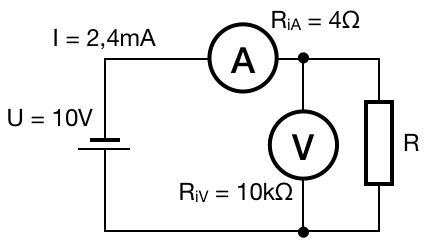

In [23]:
Image("schaltung1.png")

Der unkorrigierte Widerstandswert berechnet sich aus 

$$ R = \frac{U}{I}$$

In [24]:
U = 10
I = 2.4e-3
RiA = 4
RiV = 10e3
R = U/I # unkorrigierter Widerstandswert
print('Der unkorrigierte Widerstandswert ist R =', R, 'Ohm')

Der unkorrigierte Widerstandswert ist R = 4166.666666666667 Ohm


Allerdings registriert das Strommessgerät in dieser Schaltung nicht nur den Strom IR, der durch den Widerstand fließt, sondern auch den durch das Messgerät fließenden Strom IV: 

$$I_V = \frac{U}{R_{iV}}$$

In [25]:
IV = U/RiV # Strom, welcher über den Spannungsmesser abfließt
print('Der Strom der durch das Spannungsmessgerät fließt ist IV =', IV, 'A')

Der Strom der durch das Spannungsmessgerät fließt ist IV = 0.001 A


Die Strommessung ist in dieser Schaltung mit einem systematischen Fehler behaftet. Die Strommessung muss entsprechend korrigiert werden: 

$$I_R = I - I_V$$

In [26]:
IR = I - IV # korrigierter Stromwert, welcher über R abfließt
print('Korrektur der Strommessung liefert IR =', IR, 'A')

Korrektur der Strommessung liefert IR = 0.0013999999999999998 A


Dadurch lann der korrigierte Widerstandswert bestimmt werden:

$$ R_k = U / I_R $$

In [27]:
Rk = U/IR # korrigierter Widerstandswert
print('Der korrigierte Widerstandswert lautet R =', Rk, 'Ohm')

Der korrigierte Widerstandswert lautet R = 7142.857142857144 Ohm


Der absolute Fehler der Widerstandsmessung beträgt somit

$$A = R - R_k = \Delta R$$

undfür den relativen Fehler bezogen auf den Messwert folgt:

$$A_\mathrm{rel} = A/R_k.$$

In [33]:
A = R - Rk # absoluter systematischer Fehler
Arel = A/Rk * 100 # relativer systematischer Fehler
print('Der absolute Fehler beträgt: ', A, 'Ohm')
print('Der relative Fehler beträgt: ', Arel, '%')

Der absolute Fehler beträgt:  -2976.190476190477 Ohm
Der relative Fehler beträgt:  -41.66666666666667 %


Der Fehler kann durch einen hohen Eingangswiderstand des Messgerätes von einigen MΩ gering gehalten werden. Dadurch wird auch der durch den Spannungsmesser fließende Strom klein.

### Schaltung 2: Stromrichtige Schaltung <a id="Ü22.b"> </a>

Bei der stromrichtigen Messung wird nur der durch ein Bauteil (Widerstand R) fließende Strom gemessen. Dazu wird der Strom ohne Verzweigung unmittelbar vor oder hinter dem Bauteil gemessen. In dieser Schaltung wird die Stromstärke IR korrekt gemessen.

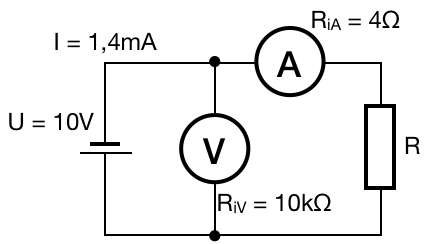

In [34]:
Image("schaltung2.png")

Der unkorrigierte Widerstandswert berechnet sich aus 

$$ R = \frac{U}{I}$$

In [35]:
U = 10
I = 1.4e-3
RiA = 4
RiV = 10e3
R = U/I # unkorrigierter Widerstandswert
print('Der unkorrigierte Widerstandswert ist R =', R, 'Ohm')

Der unkorrigierte Widerstandswert ist R = 7142.857142857143 Ohm


Das Spannungsmessgerät registriert in dieser Schaltung nicht nur die an R abfallende Spannung UR, sondern auch die über dem Strommessgerät abfallende Spannung UA:

$$U_A = R_{iA} \cdot I$$

In [36]:
UA = RiA*I # Spannungsabfall am Strommessgerät
print('Die Spannung, die über dem Strommessgerät abfällt ist UA =', UA, 'V')

Die Spannung, die über dem Strommessgerät abfällt ist UA = 0.0056 V


Die Spannungsmessung ist also in dieser Schaltung mit einem systematischen Fehler behaftet, welcher vom eigentlichen Spannungswert abgezogen werden muss:

$$U_R = U - U_A.$$

In [37]:
UR = U - UA # korrigierter Spannungswert über R
print('Korrektur der Spannungsmessung liefert UR =', UR, 'V')

Korrektur der Spannungsmessung liefert UR = 9.9944 V


Dadurch kann der korrigierte Widerstandswert bestimmt werden:

$$R_k = U_R/I$$

In [38]:
Rk = UR/I # korrigierter Widerstandswert
print('Der korrigierte Widerstandswert lautet R =', Rk, 'Ohm')

Der korrigierte Widerstandswert lautet R = 7138.857142857143 Ohm


Die absolute Abweichung der Widerstandsmessung berechnet sich über:

$$ A = R - R_k = \Delta R$$

und die relative Abweichung bezogen auf den Messwert zu

$$A_\mathrm{rel} = \frac{A}{R_k}$$

In [39]:
A = R - Rk # absoluter systematischer Fehler
Arel = A/Rk * 100 # relativer systematischer Fehler
print('Der absolute Fehler beträgt: ', A, 'Ohm')
print('Der relative Fehler beträgt: ', Arel, '%')

Der absolute Fehler beträgt:  4.0 Ohm
Der relative Fehler beträgt:  0.05603137757144001 %


Um die Abweichung möglichst gering zu halten, muss der Innenwiderstand des Strommessers möglichst gering sein. Dadurch wird auch die über dem Strommesser abfallende Spannung UA klein.

## Lösung zu 2

### Leistungsmessung <a id="Ü22.c"> </a>

Im Gleichstromkreis werden gleichzeitig Strom- und Spannungsmessung mit einer stromrichtigen Messschaltung an einem Widerstand R durchgeführt. Die Strommessung liefert I = 140mA, die Spannungsmessung U = 10V. 
Über die Gleichung für die Leistung kann das unberichtigte Ergebnis für die Leistungsmessung bestimmt werden:

In [40]:
U = 10
I = 200e-3
RiA = 4
P = U*I
print('Die Leistung beträgt P = ', P, 'W')

Die Leistung beträgt P =  2.0 W


Allgemein gilt für die die Abweichung der indirekten Messung, also der Fortpflanzung der bekannten systematischen Abweichung:

$$ \Delta y = \sum_{i=1}^n\frac{\partial y}{\partial x_i}\cdot \Delta x_i $$

bezogen auf die Bestimmungsgleichung der Leistung:

$$ \Delta P = \frac{\partial P}{\partial U} \Delta U + \frac{\partial P}{\partial I} \Delta I $$

nach Ausführung der partiellen Differentiation ergibt sich:

$$ \Delta P = I \cdot \Delta U + U \cdot \Delta I $$

weil eine stromrichtige Messung verwendet wird, tritt keine systematische Abweichung bezüglich des Stromes auf, d. h. $\Delta I = 0$, somit vereinfacht sich die Gleichung zu:

$$ \Delta P = I \cdot \Delta U $$

Das Voltmeter zeigt eine Spannung an, die der Summe der Spannung über RiV und der Spannung über dem Strommesser entspricht. Die Spannung über dem Strommesser darf für die Berechnung der Leistung über R nicht mit herangezogen werden, sie ist in unserem Fall identisch mit der systematischen Abweichung:

$$ \Delta P = I \cdot \Delta U  = I \cdot U_\mathrm{iA} = I \cdot I \cdot R_\mathrm{iA}$$

In [41]:
dP = I**2 * RiA
print('Die systematische Abweichung der Leistung beträgt dP = ', dP, 'W')
print('Die korrigierte Leistung ist: Pk = ',P-dP, 'W')

Die systematische Abweichung der Leistung beträgt dP =  0.16000000000000003 W
Die korrigierte Leistung ist: Pk =  1.8399999999999999 W
